# Imports and Data Frame Creation

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
import seaborn as sns

In [19]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', compression='zip')

# '?' Entered into Data

In [20]:
for col in df.describe().columns:
    nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index
    df.loc[nanidx, col] = '?'

# Understanding the Data

In [21]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [22]:
df.describe()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,101727,71505,6,3,10,10,9,27,18,15,...,1,4,4,2,2,2,2,2,2,3
top,?,88785891,Caucasian,Female,[70-80),?,1,1,7,3,...,No,No,No,No,No,No,No,No,Yes,NO
freq,40,40,76099,54708,26068,98569,53979,60209,57438,17742,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null object
patient_nbr                 101766 non-null object
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null object
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null object
num_procedures              101766 non-null object
num_medications             101766 non-null object
number_outpatient           101766 non-null object
number_emergency            101766 non-null object
number_inpatient      

In [24]:
df.weight.value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [25]:
for col in list(df.columns):
    print(df.loc[df[col] == '?'])

      encounter_id patient_nbr             race  gender      age    weight  \
4643             ?      916947  AfricanAmerican    Male  [70-80)         ?   
10820            ?    19471698        Caucasian  Female  [50-60)         ?   
17843            ?    27121032                ?    Male  [60-70)         ?   
20553            ?    20833083        Caucasian    Male  [40-50)         ?   
22120            ?   108696051        Caucasian    Male  [70-80)         ?   
24708            ?     5614398        Caucasian  Female  [70-80)         ?   
24875            ?    24347115        Caucasian  Female  [60-70)         ?   
26908            ?    62451810        Caucasian  Female  [70-80)         ?   
29488            ?    17523513                ?    Male  [50-60)         ?   
31887            ?    24512868        Caucasian    Male  [50-60)         ?   
37451            ?    23645421  AfricanAmerican  Female  [70-80)         ?   
37488            ?    24574734  AfricanAmerican  Female  [50-60)

[98569 rows x 50 columns]
      encounter_id patient_nbr             race  gender      age weight  \
5990      30393774     1800288  AfricanAmerican  Female  [60-70)      ?   
10535     44575380    26020656        Caucasian    Male  [60-70)      ?   
13951     54913968   101871360        Caucasian  Female  [60-70)      ?   
21000     73504854     3308436        Caucasian    Male  [70-80)      ?   
27824     91136214   102880899         Hispanic    Male  [70-80)      ?   
37664    116955444    23216220        Caucasian    Male  [80-90)      ?   
41181    127567038    23529906  AfricanAmerican    Male  [50-60)      ?   
43868    135382578    42010020        Caucasian  Female  [80-90)      ?   
45053    139094994    65027664  AfricanAmerican    Male  [50-60)      ?   
51506    153549282    71195022  AfricanAmerican  Female  [60-70)      ?   
54259    158189556   101019879            Asian  Female  [80-90)      ?   
56163    161590566    23718141        Caucasian  Female  [30-40)      ?   

       encounter_id patient_nbr             race  gender      age weight  \
845         6636342    55632276        Caucasian  Female  [70-80)      ?   
10697      45033684    23665284        Caucasian    Male  [50-60)      ?   
11312      46857222      964701  AfricanAmerican  Female  [70-80)      ?   
11556      47748546     3509109        Caucasian  Female  [40-50)      ?   
13960      54927762    26119467        Caucasian  Female  [80-90)      ?   
...             ...         ...              ...     ...      ...    ...   
93933     341968946    57417741        Caucasian  Female  [40-50)      ?   
95576     363703772   165828443        Caucasian    Male  [70-80)      ?   
95848     367237778    85442634        Caucasian  Female  [50-60)      ?   
98667     403770110   138996032  AfricanAmerican    Male  [60-70)      ?   
100562    427835504    78840810        Caucasian    Male  [60-70)      ?   

       admission_type_id discharge_disposition_id admission_source_id  \
845           

[61 rows x 50 columns]
       encounter_id patient_nbr             race  gender      age   weight  \
2703       17370804    24514578                ?  Female  [30-40)  [50-75)   
2846       18193344      436446  AfricanAmerican  Female  [50-60)        ?   
3343       20833878    68380470        Caucasian    Male  [50-60)        ?   
3689       22281006    88955190  AfricanAmerican    Male  [70-80)        ?   
4754       26151918      362610        Caucasian  Female  [70-80)        ?   
...             ...         ...              ...     ...      ...      ...   
97126     384408632    33906141        Caucasian  Female  [80-90)        ?   
97723     392040620    41882994        Caucasian  Female  [60-70)        ?   
99561     414900302    59903226        Caucasian    Male  [80-90)        ?   
101462    439630898    38555469        Caucasian    Male  [70-80)        ?   
101575    441383192    90980892  AfricanAmerican  Female  [80-90)        ?   

       admission_type_id discharge_dispo

[21 rows x 50 columns]
       encounter_id patient_nbr             race  gender      age weight  \
0           2278392     8222157        Caucasian  Female   [0-10)      ?   
66           715086     3376278        Caucasian    Male  [10-20)      ?   
216         2735964     2359485        Caucasian  Female   [0-10)      ?   
263         2948334     3425292  AfricanAmerican  Female  [30-40)      ?   
431         3902532     4893183  AfricanAmerican  Female  [20-30)      ?   
...             ...         ...              ...     ...      ...    ...   
99621     415526432    43332570        Caucasian    Male  [70-80)      ?   
100559    427825172    39827439        Caucasian  Female  [70-80)      ?   
100787    430828958   146717159        Caucasian  Female   [0-10)      ?   
101192    436145102   105360030        Caucasian    Male  [80-90)      ?   
101719    443256548   162949523        Caucasian    Male  [10-20)      ?   

       admission_type_id discharge_disposition_id admission_sour

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 50 columns]
Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_proce

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 50 columns]
Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_proce

In [26]:
list(df.columns)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

# Replace '?' with NaN

In [27]:
df2 = df.replace('?', np.nan)

# Convert Objects to Floats

In [28]:
df2 = df2.astype({'time_in_hospital': 'float', 'num_lab_procedures': 'float', 'num_procedures': 'float',
                  'num_medications': 'float', 'number_outpatient': 'float', 'number_emergency': 'float',
                 'number_inpatient': 'float'}, copy = False)

In [29]:
df2.isnull().sum()*100/df2.isnull().count()

encounter_id                 0.039306
patient_nbr                  0.023584
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.022601
discharge_disposition_id     0.041271
admission_source_id          0.091386
time_in_hospital             0.068785
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.049132
num_procedures               0.059941
num_medications              0.095317
number_outpatient            0.017688
number_emergency             0.046184
number_inpatient             0.027514
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.026531
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [30]:
df2.weight.value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [31]:
df2 = df2.drop(columns = ['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr'])

In [32]:
df2.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2.0,1.0,2.0,3.0,31.0,6.0,16.0,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3.0,1.0,2.0,4.0,70.0,1.0,21.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),1.0,1.0,7.0,5.0,73.0,0.0,12.0,...,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2.0,1.0,4.0,13.0,68.0,2.0,28.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),3.0,3.0,4.0,12.0,33.0,3.0,18.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [33]:
df3 = df2.loc[:,['time_in_hospital','num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient']]


# Fill NaN with Column Mean

In [34]:
df3 = df2.fillna(df2.mean())
df3.head()

KeyboardInterrupt: 

# Visualizing Outliers

In [ ]:
plt.figure(figsize = (15,5)) 

plt.subplot(2,3,1)
plt.boxplot(df3['time_in_hospital'], whis = 5)
plt.title('Time in Hospital')

plt.subplot(2,3,2)
plt.boxplot(df3['num_lab_procedures'], whis = 5)
plt.title('Number of Lab Procedures')

plt.subplot(2,3,3)
plt.boxplot(df3['num_procedures'], whis = 5)
plt.title('Number of Procedures')

plt.subplot(2,3,4)
plt.boxplot(df3['number_outpatient'], whis = 5)
plt.title('Number of Outpatient')

plt.subplot(2,3,5)
plt.boxplot(df3['number_emergency'], whis = 5)
plt.title('Number of Emergency')

plt.subplot(2,3,6)
plt.boxplot(df3['number_inpatient'], whis = 5)
plt.title('Number of Inpatient')

plt.suptitle('Looking for Outliers')
plt.show()

# Winsorizing Outliers

In [ ]:
winsorized_number_outpatient = winsorize(df3['number_outpatient'], (0, .05))
winsorized_number_emergency = winsorize(df3['number_emergency'], (0, .05))
winsorized_number_inpatient = winsorize(df3['number_inpatient'], (0, .05))

In [ ]:
plt.figure(figsize = (15,5)) 

plt.subplot(2,3,1)
plt.boxplot(df3['time_in_hospital'], whis = 5)
plt.title('Time in Hospital')

plt.subplot(2,3,2)
plt.boxplot(df3['num_lab_procedures'], whis = 5)
plt.title('Number of Lab Procedures')

plt.subplot(2,3,3)
plt.boxplot(df3['num_procedures'], whis = 5)
plt.title('Number of Procedures')

plt.subplot(2,3,4)
plt.boxplot(winsorized_number_outpatient, whis = 5)
plt.title('Number of Outpatient')

plt.subplot(2,3,5)
plt.boxplot(winsorized_number_emergency, whis = 5)
plt.title('Number of Emergency')

plt.subplot(2,3,6)
plt.boxplot(winsorized_number_inpatient, whis = 5)
plt.title('Number of Inpatient')

plt.suptitle('Winsorized Data')
plt.show()

# Create df for numeric values

In [ ]:
df_cat = df2.drop(columns = ['time_in_hospital','num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient'])

In [ ]:
df_cat.info()

In [ ]:
for col in df_cat[df_cat.describe().columns]:
    mode = df_cat[col].mode()
    df_cat[col] = df_cat[col].fillna(mode)

In [ ]:
df_cat.head()

# Try using multiple methods on the same data. How do your results differ depending on the order you do them?

1) It makes sense to use mean for imputation of numeric values

2) Depending on the categorical values, we could use mode for imputation

3) Separate the data in multiple dataframes based on numberical and categorical data then use the appropriate method for cleaning the data and then imputating the cleaned data. Finally, we can concantenate the cleaned dataframes into one dataframe and perform the respective analysis.

## Create Binary Column for Readmission 

In [ ]:
df_cat['readmitted_binary'] = df_cat['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

In [ ]:
df_cat.head()

## Determine Relationship between Race and Readmission

In [ ]:
sns.barplot(x= 'race', y ='readmitted_binary', data = df_cat)

In [ ]:
sns.countplot('race', hue = 'readmitted_binary', data = df_cat)

In [ ]:
count_table = pd.crosstab(df_cat['readmitted_binary'], df_cat['race'])
count_table

In [ ]:
stats.chisquare(count_table, axis = None)

In [ ]:
type(count_table)

**Conclusion:** Race has an impact on readmission rates

## Determine Relationship between Gender and Readmission

In [ ]:
sns.barplot(x= 'gender', y ='readmitted_binary', data = df_cat)

In [ ]:
count_table1 = pd.crosstab(df_cat['readmitted_binary'], df_cat['gender'])
count_table1

In [ ]:
stats.chisquare(count_table1, axis = None)

**Conclusion:** Gender has an impact on readmission rates

## Determine Relationship between Insulin and Readmission

In [ ]:
sns.barplot(x= 'insulin', y ='readmitted_binary', data = df_cat)

In [ ]:
count_table2 = pd.crosstab(df_cat['readmitted_binary'], df_cat['insulin'])
count_table2

In [ ]:
stats.chisquare(count_table2, axis = None)

## Adding Readmitted Binary into DF2

In [ ]:
df2['readmitted_binary'] = df2['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

## Determine Relationship between Time in Hospital and Readmission

In [ ]:
plt.hist(df2['time_in_hospital'])

In [ ]:
admitted_time = df2.loc[df2['readmitted_binary']==0, 'time_in_hospital'] 
not_admitted_time = df2.loc[df2['readmitted_binary']==1, 'time_in_hospital']

In [ ]:
age_list=df2['age'].unique()

In [ ]:
sns.countplot(df2['age'])

In [ ]:
age_dic={}
for i in range(len(age_list)):
    age_dic[age_list[i]]=i


df2['age_rank'] = df['age'].map(age_dic)

In [ ]:
df2.head()

In [ ]:
sns.countplot(df2['age_rank'])

In [ ]:
df_num = df2.select_dtypes(include='number').copy()

In [ ]:
df_num.head()

In [ ]:
df_num.drop(['admission_type_id','discharge_disposition_id','admission_source_id','readmitted_binary','age_rank'], axis=1, inplace=True);

In [ ]:
df_num.head()

In [ ]:
for name in df_num.columns:
    sns.countplot(df_num[name])
    plt.xticks(rotation=90)
    plt.show()
    

In [ ]:
# scale to max
for name in df_num.columns:
    sns.countplot(df_num[name]/df_num[name].max()  )
    plt.xticks(rotation =90)
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()

In [ ]:
for name in df_num.columns:
    df_num['scale_'+name]=scaler.fit_transform(df_num[[name]])
    sns.countplot(df_num['scale_'+name])
    plt.xticks(rotation =90)
    plt.show()

## Combining two problematic features

Number of diagnoses and age group

In [ ]:
sns.barplot(data = df2, x= 'age_rank', y= 'number_diagnoses')

In [ ]:
#Frequency of number of diagnoses for age group 9
sns.countplot(df2.loc[df2['age_rank']==9, 'number_diagnoses'])

In [ ]:
#Frequency of number of diagnoses for age group 0
sns.countplot(df2.loc[df2['age_rank']==0, 'number_diagnoses'])

In [ ]:
df2.corr()

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
df2.columns

In [ ]:
df2 = df2.fillna(0)
Y=df2['readmitted_binary']
X=df2.drop(columns=['race', 'gender', 'age','diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted','readmitted_binary'], axis=1)

In [ ]:
k  = 5
kbest = SelectKBest(k=k, score_func= f_classif)
X_best_feature = kbest.fit_transform(X,Y)


In [ ]:
X_best_feature = pd.DataFrame(X_best_feature, columns = X.columns[kbest.get_support()])

In [ ]:
X_best_feature.columns

In [ ]:
X_best_feature.head()

In [ ]:
kbest.scores_

In [ ]:
pd.Series(kbest.scores_, index=X.columns)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components =11)
X_pca =pca.fit_transform(X)
cov = np.cov(X_pca.T)

In [ ]:
sns.heatmap(cov)

In [ ]:
plt.plot(cov);

Splitting DF 

In [35]:
pre_split_df = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', 
    usecols=['readmitted',
        'time_in_hospital', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient'
    ],
    compression='zip'
)

In [36]:
pre_split_df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [37]:
pre_split_df['readmitted_binary'] = pre_split_df['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

In [38]:
pre_split_df['readmitted_binary'].value_counts()

0    54864
1    46902
Name: readmitted_binary, dtype: int64

In [39]:
y = pre_split_df['readmitted_binary']
x = pre_split_df.drop(["readmitted_binary", "readmitted"], axis=1)

In [40]:
y.value_counts()

0    54864
1    46902
Name: readmitted_binary, dtype: int64

In [41]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 5 columns):
time_in_hospital     101766 non-null int64
num_medications      101766 non-null int64
number_outpatient    101766 non-null int64
number_emergency     101766 non-null int64
number_inpatient     101766 non-null int64
dtypes: int64(5)
memory usage: 3.9 MB


In [87]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, 
                                                    stratify=y)

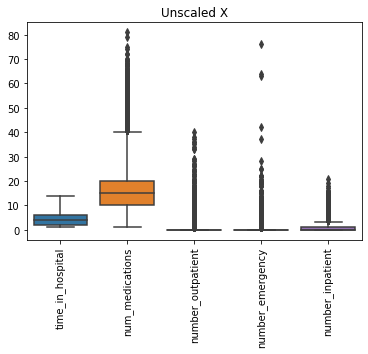

In [43]:
ax = sns.boxplot(data=X_train, whis=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Unscaled X')
plt.show()

In [86]:
from sklearn.preprocessing import QuantileTransformer

scale = QuantileTransformer(output_distribution='normal')

X_train_scale = scale.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns)

X_test_scale = scale.transform(X_test)
X_test_scale = pd.DataFrame(X_test_scale, columns=X_test.columns)

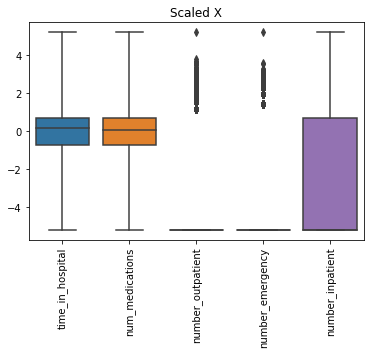

In [45]:
ax = sns.boxplot(data=X_train_scale, whis=5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Scaled X')
plt.show()

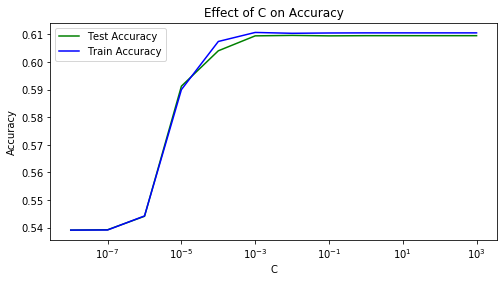

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

c_vals = [.00000001, .0000001, .000001, .00001, .0001, .001, .01, .1, 1, 10, 100, 1000]
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='liblinear', penalty='l2', C=c, max_iter=100)
  lr.fit(X_train, Y_train)
  test_accuracy.append(lr.score(X_test, Y_test))
  train_accuracy.append(lr.score(X_train, Y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
# ax = sns.lineplot(data=score_data)
ax1.set(xscale='log')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [80]:
clf = LogisticRegression(solver='liblinear', max_iter=1000)
cv_scores = cross_val_score(clf, X_train, Y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.61026109 0.61100583 0.61304134 0.61114621 0.6147961 ]
Mean cross validation score: 0.612


In [47]:
score_data = pd.DataFrame(score_list, index=c_values, 
                          columns=['Train Score', 'Test Score', 'Train Log Loss', 'Test Log Loss'])
score_data

NameError: name 'score_list' is not defined

In [ ]:
ax = sns.lineplot(data=score_data)
ax.set(xscale='log')
plt.axvline(score_data['Test Score'].idxmax(), color='k')
plt.axvline(score_data['Test Log Loss'].idxmin(), color='r')
plt.xlabel('C')
plt.ylabel('Scores')
plt.text(0.0005, 0.68, 'max test\naccuracy')
plt.text(0.2, 0.6, 'min test\nlog loss', color='r')
plt.title('Scores vs C Hyperparameter')
plt.show()